In [131]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/hotel_data_modified.csv', parse_dates=['reservation_status_date'])
df.drop_duplicates(keep='first', inplace=True)

In [132]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             451
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
agent                             11988
company                           81115
days_in_waiting_list                  0


<Axes: >

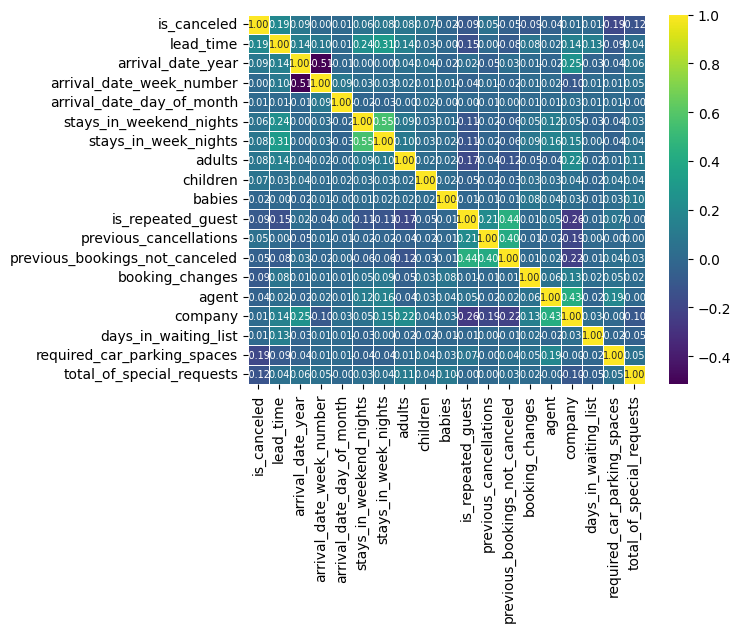

In [133]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()
sns.heatmap(data = corr_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt = ".2f", annot_kws={"size": 7}) 

<Axes: xlabel='is_canceled', ylabel='count'>

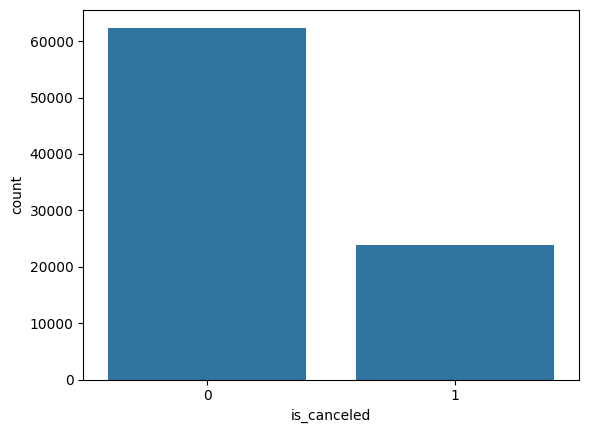

In [134]:
sns.countplot(x='is_canceled', data=df)

In [135]:
df['is_canceled'].value_counts()

is_canceled
0    62398
1    23889
Name: count, dtype: int64

In [136]:
is_cancel_df = df[df['is_canceled'] == 1]
is_cancel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,A,0,240.0,NaN,0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,D,0,15.0,NaN,0,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,E,E,0,240.0,NaN,0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,E,E,0,240.0,NaN,0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,E,E,0,NaN,NaN,0,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,D,K,1,9.0,NaN,0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,A,A,0,NaN,238.0,0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,A,A,0,NaN,238.0,0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,A,D,0,NaN,238.0,0,0,0,No-Show,2017-07-17


In [137]:
is_can_leadtime_df = is_cancel_df[['is_canceled','lead_time']]
is_can_leadtime_df

,is_canceled,lead_time
8,1,85
9,1,75
10,1,23
27,1,60
32,1,96
...,...,...
110280,1,132
111355,1,4
111924,1,7
111925,1,6


In [138]:
not_can_df = df[df['is_canceled'] == 0]
not_can_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,394.0,NaN,0,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,9.0,NaN,0,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,9.0,NaN,0,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,89.0,NaN,0,0,0,Check-Out,2017-09-07


<Axes: xlabel='is_canceled', ylabel='lead_time'>

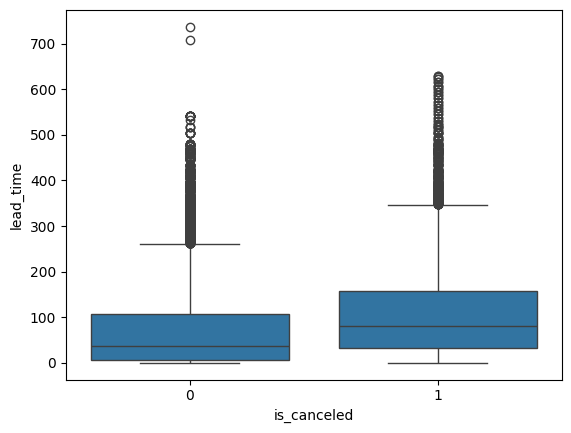

In [139]:
not_can_leadtime_df = not_can_df[['is_canceled','lead_time']]
not_can_leadtime_df
sns.boxplot(data=df, x='is_canceled', y='lead_time')

## 0이 캔슬되지 않은 지표이고 1이 캔슬된 지표 각각 lead_time에 따라 박스플롯으로 표현되어있고 보면 lead_time이 캔슬되지 않은 쪽은 박스가 0에서 120정도 사이에서 머물고 있고 캔슬된 쪽 박스는 50에서 200 정도 사이에 박스가 존재한다. 따라서 lead_time이 길어질수록 예약취소확률이 올라간다고 볼 수 있을 것 같다.

In [140]:
is_can_year_df = is_cancel_df[['is_canceled', 'arrival_date_year']]
is_can_year_df.value_counts()

is_canceled  arrival_date_year
1            2016                 11131
             2017                 10082
             2015                  2676
Name: count, dtype: int64

In [141]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    41752
2017    31375
2015    13160
Name: count, dtype: int64

## 캔슬된 예약의 해당 년도를 확인해보았는데 캔슬 횟수와 예약 비율이 비슷해서 년도가 예약 캔슬에 큰 영향은 없는 것으로 보인다.

In [142]:
set_df = df.drop(columns='arrival_date_year')
set_df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,...,A,A,0,394.0,NaN,0,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,...,E,E,0,9.0,NaN,0,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,...,D,D,0,9.0,NaN,0,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,...,A,A,0,89.0,NaN,0,0,0,Check-Out,2017-09-07


In [143]:
is_can_date_df = is_cancel_df[['is_canceled', 'arrival_date_month']]
is_can_date_df.value_counts()

is_canceled  arrival_date_month
1            August                3603
             July                  3176
             May                   2431
             April                 2398
             June                  2344
             March                 1821
             October               1631
             September             1628
             February              1405
             December              1372
             November              1048
             January               1032
Name: count, dtype: int64

## 각 달마다 예약 횟수를 카운트해서 어떤 달이 예약 캔슬이 많나 비교해보았다. 여름쪽이 예약 취소 횟수가 높고 겨울쪽이 예약 취소 횟수가 적었다. 약 2배가량 차이가 난다. 데이터가 한국데이터인지 해외 데이터인지 모르겠는데 어쨌든 한국 기준으론 그러하다.

In [144]:
is_cancel_df[['is_canceled', 'arrival_date_week_number']].value_counts()

is_canceled  arrival_date_week_number
1            33                          918
             32                          778
             34                          772
             30                          760
             28                          743
             31                          729
             18                          710
             27                          704
             29                          678
             35                          650
             15                          611
             21                          607
             25                          554
             17                          545
             19                          536
             26                          536
             16                          531
             20                          515
             23                          513
             24                          511
             22                          491
             14  

In [145]:
set_df = set_df.drop(columns='arrival_date_week_number')
set_df = set_df[set_df['is_canceled'] == 1]
set_df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,July,1,0,3,2,0.0,0,...,A,A,0,240.0,NaN,0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,July,1,0,3,2,0.0,0,...,D,D,0,15.0,NaN,0,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,July,1,0,4,2,0.0,0,...,E,E,0,240.0,NaN,0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,July,1,2,5,2,0.0,0,...,E,E,0,240.0,NaN,0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,July,1,2,8,2,0.0,0,...,E,E,0,NaN,NaN,0,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,April,25,0,0,0,0.0,0,...,D,K,1,9.0,NaN,0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,June,5,1,0,1,0.0,0,...,A,A,0,NaN,238.0,0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,May,31,0,1,1,0.0,0,...,A,A,0,NaN,238.0,0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,July,17,1,0,1,0.0,0,...,A,D,0,NaN,238.0,0,0,0,No-Show,2017-07-17


In [146]:
set_df['arrival_date_day_of_month'].value_counts()
set_df = set_df.drop(columns='arrival_date_day_of_month')

In [147]:
set_df

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,July,0,3,2,0.0,0,BB,...,A,A,0,240.0,NaN,0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,July,0,3,2,0.0,0,HB,...,D,D,0,15.0,NaN,0,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,July,0,4,2,0.0,0,BB,...,E,E,0,240.0,NaN,0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,July,2,5,2,0.0,0,BB,...,E,E,0,240.0,NaN,0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,July,2,8,2,0.0,0,BB,...,E,E,0,NaN,NaN,0,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,April,0,0,0,0.0,0,BB,...,D,K,1,9.0,NaN,0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,June,1,0,1,0.0,0,BB,...,A,A,0,NaN,238.0,0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,May,0,1,1,0.0,0,BB,...,A,A,0,NaN,238.0,0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,July,1,0,1,0.0,0,BB,...,A,D,0,NaN,238.0,0,0,0,No-Show,2017-07-17


## 예약취소와 관련이 없는 열들은 하나씩 삭제중

In [148]:
df[['is_canceled', 'stays_in_weekend_nights']].value_counts()
set_df = set_df.drop(columns='stays_in_weekend_nights')

In [149]:
df[['is_canceled','stays_in_week_nights']].value_counts()

is_canceled  stays_in_week_nights
0            1                       17043
             2                       14555
             3                       11234
             5                        6467
1            2                        5930
0            4                        5242
             0                        4973
1            1                        4902
             3                        4833
             5                        3010
             4                        2545
             0                        1139
0            6                         841
             10                        695
             7                         653
1            6                         518
0            8                         405
1            7                         295
             10                        260
             8                         197
0            9                         132
1            9                          82
0            15     

In [150]:
set_df = set_df.drop(columns = 'stays_in_week_nights')

In [151]:
df[['is_canceled','adults']].value_counts()
set_df = set_df.drop(columns = 'adults')

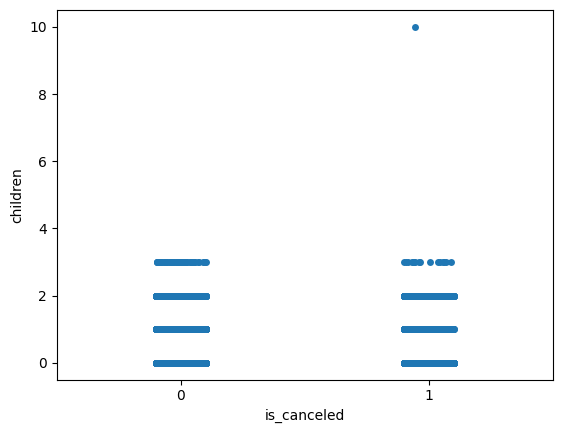

In [152]:
child_df = df[['is_canceled','children']]
sns.stripplot(data=child_df, x='is_canceled', y='children')
set_df = set_df.drop(columns='children')

In [153]:
df[['is_canceled','babies']].value_counts()
set_df = set_df.drop(columns = 'babies')

In [154]:
df['meal'].replace("Undefined", "BB", inplace=True)
df[['is_canceled', 'meal']].value_counts()

is_canceled  meal
0            BB      49618
1            BB      18010
0            HB       6440
             SC       6083
1            SC       3342
             HB       2439
0            FB        257
1            FB         98
Name: count, dtype: int64

<Axes: xlabel='meal', ylabel='is_canceled'>

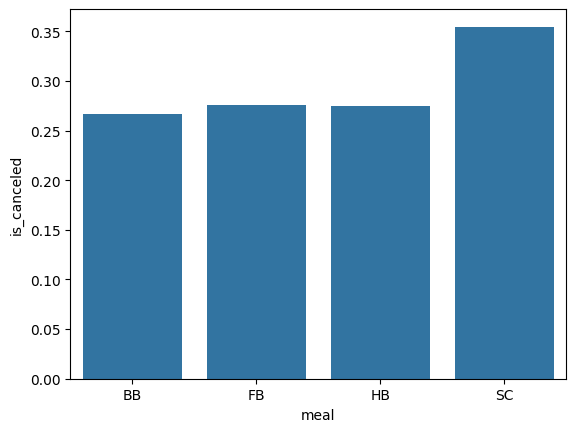

In [155]:
sns.barplot(data=df, x='meal',y='is_canceled',errorbar=None)

## 식사여부에 따라서 예약 취소율이 비교적 높은 것은 SC로 보인다. 식사를 아예 제공하지 않는 건 예약 취소에 조금 더 영향이 있는 것 같다.

In [156]:
country_counts = df['country'].value_counts()

In [157]:
top_countries = country_counts.head(10).index

In [158]:
df_filtered = df[df['country'].isin(top_countries)]

<Axes: xlabel='country', ylabel='count'>

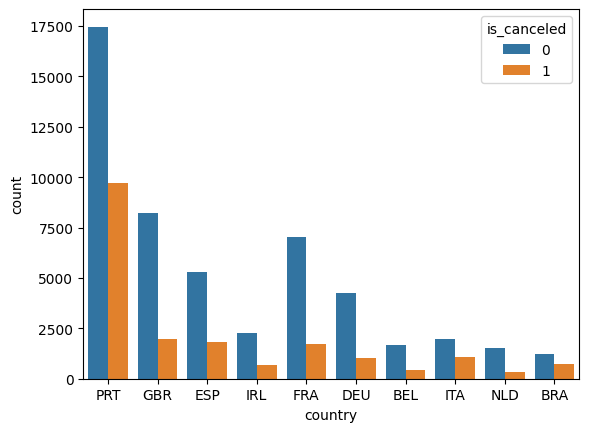

In [159]:
sns.countplot(data=df_filtered, x='country', hue='is_canceled')

## 나라가 많아서 지표가 많은 순으로 상위 10개국만 캔슬 여부를 그래프로 비교해보았는데 포르투갈이 예약 횟수 자체는 가장 많으나 취소율도 50프로가 넘을 정도로 많다

In [160]:
df[['is_canceled','market_segment']].value_counts()

is_canceled  market_segment
0            Online TA         33065
1            Online TA         18166
0            Offline TA/TO     11571
             Direct             9983
             Corporate          3665
             Groups             3320
1            Offline TA/TO      2046
             Direct             1721
             Groups             1318
0            Complementary       612
1            Corporate           504
0            Aviation            182
1            Complementary        88
             Aviation             44
             Undefined             2
Name: count, dtype: int64

## 온라인 타겟 약 5만명 중 약 2만명이 취소한다 다른 것들은 5분의1 비율인 거에 비해 ONLINE TA는 5분의 2 비율이 예약을 취소하는 것인데 ONLINE TA가 가장 많은 예약 수를 차지하므로 줄일 방법을 찾아야 할 것 같다.

In [161]:
df[['is_canceled','distribution_channel']].value_counts()

is_canceled  distribution_channel
0            TA/TO                   46970
1            TA/TO                   21306
0            Direct                  10917
             Corporate                4365
1            Direct                   1907
             Corporate                 636
0            GDS                       145
1            GDS                        36
             Undefined                   4
0            Undefined                   1
Name: count, dtype: int64

In [162]:
set_df

,hotel,is_canceled,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,July,BB,PRT,Online TA,TA/TO,0,0,...,A,A,0,240.0,NaN,0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,July,HB,PRT,Offline TA/TO,TA/TO,0,0,...,D,D,0,15.0,NaN,0,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,July,BB,PRT,Online TA,TA/TO,0,0,...,E,E,0,240.0,NaN,0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,July,BB,PRT,Online TA,TA/TO,0,0,...,E,E,0,240.0,NaN,0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,July,BB,PRT,Direct,Direct,0,0,...,E,E,0,NaN,NaN,0,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,April,BB,FRA,Online TA,TA/TO,0,0,...,D,K,1,9.0,NaN,0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,June,BB,PRT,Corporate,Corporate,1,0,...,A,A,0,NaN,238.0,0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,May,BB,PRT,Corporate,Corporate,1,0,...,A,A,0,NaN,238.0,0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,July,BB,PRT,Corporate,Corporate,1,1,...,A,D,0,NaN,238.0,0,0,0,No-Show,2017-07-17


In [163]:
df[['is_canceled', 'is_repeated_guest']].value_counts()

is_canceled  is_repeated_guest
0            0                    59250
1            0                    23628
0            1                     3148
1            1                      261
Name: count, dtype: int64

<Axes: xlabel='is_repeated_guest', ylabel='count'>

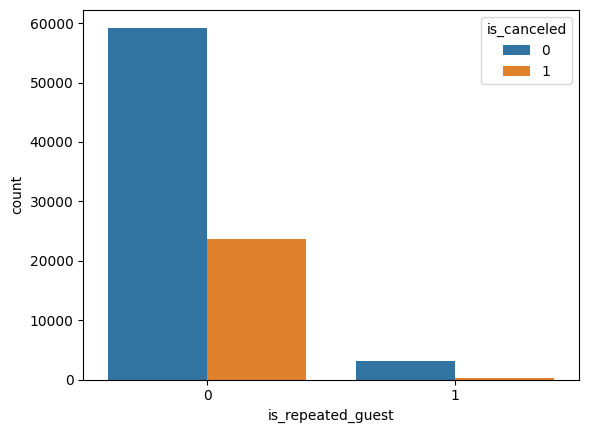

In [164]:
sns.countplot(data = df, x='is_repeated_guest', hue ='is_canceled')

## 그래프가 좀 작아서 잘 안 보이긴 한데 기존고객이 아닌 사람의 취소율과 기존고객의 취소율 차이가 크다. 취소율을 줄이려면 기존고객이 아닌 사람들을 조금 더 신경쓰는 방안을 모색해야할 것 같다. (최초 고객에게 프로모션 제공 등의 방법)

In [165]:
set_df

,hotel,is_canceled,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,July,BB,PRT,Online TA,TA/TO,0,0,...,A,A,0,240.0,NaN,0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,July,HB,PRT,Offline TA/TO,TA/TO,0,0,...,D,D,0,15.0,NaN,0,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,July,BB,PRT,Online TA,TA/TO,0,0,...,E,E,0,240.0,NaN,0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,July,BB,PRT,Online TA,TA/TO,0,0,...,E,E,0,240.0,NaN,0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,July,BB,PRT,Direct,Direct,0,0,...,E,E,0,NaN,NaN,0,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,April,BB,FRA,Online TA,TA/TO,0,0,...,D,K,1,9.0,NaN,0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,June,BB,PRT,Corporate,Corporate,1,0,...,A,A,0,NaN,238.0,0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,May,BB,PRT,Corporate,Corporate,1,0,...,A,A,0,NaN,238.0,0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,July,BB,PRT,Corporate,Corporate,1,1,...,A,D,0,NaN,238.0,0,0,0,No-Show,2017-07-17


In [166]:
df[['is_canceled', 'previous_cancellations']].value_counts()

is_canceled  previous_cancellations
0            0                         61857
1            0                         22762
             1                          1056
0            1                           336
             2                            78
             3                            45
1            2                            34
0            11                           25
             4                            24
             5                            17
1            3                            15
0            6                            15
1            4                             6
             13                            3
             5                             2
             6                             2
             11                            2
             24                            2
0            13                            1
1            14                            1
             19                            1
             21    

In [167]:
df["had_previous_cancellation"] = df["previous_cancellations"] > 0
grouped_counts = df.groupby("had_previous_cancellation")["is_canceled"].value_counts().unstack()
print(grouped_counts)

is_canceled                    0      1
had_previous_cancellation              
False                      61857  22762
True                         541   1127


## 취소 경험이 없는 사람 중에 취소한 비율은 약 4분의 1,
## 취소 경험이 있는 사람중에 취소한 비율은 약 3분의 2
## 취소 비율은 경험있는 사람들이 많지만 총 인원 수는 취소 경험이 없는 사람들의 취소 횟수가 압도적으로 많으므로 취소 여부는 취소율을 줄이는데 큰 영향이 없을 것 같다.

In [168]:
set_df = set_df.drop(columns='previous_cancellations')

In [169]:
df[['is_canceled','previous_bookings_not_canceled']].isna().sum()

is_canceled                       0
previous_bookings_not_canceled    0
dtype: int64

In [170]:
set_df.drop(columns = 'previous_bookings_not_canceled')

,hotel,is_canceled,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,July,BB,PRT,Online TA,TA/TO,0,A,A,0,240.0,NaN,0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,July,HB,PRT,Offline TA/TO,TA/TO,0,D,D,0,15.0,NaN,0,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,July,BB,PRT,Online TA,TA/TO,0,E,E,0,240.0,NaN,0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,July,BB,PRT,Online TA,TA/TO,0,E,E,0,240.0,NaN,0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,July,BB,PRT,Direct,Direct,0,E,E,0,NaN,NaN,0,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,April,BB,FRA,Online TA,TA/TO,0,D,K,1,9.0,NaN,0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,June,BB,PRT,Corporate,Corporate,1,A,A,0,NaN,238.0,0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,May,BB,PRT,Corporate,Corporate,1,A,A,0,NaN,238.0,0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,July,BB,PRT,Corporate,Corporate,1,A,D,0,NaN,238.0,0,0,0,No-Show,2017-07-17


In [171]:
df[['is_canceled','reserved_room_type']].value_counts()

is_canceled  reserved_room_type
0            A                     41138
1            A                     14584
0            D                     12018
1            D                      5217
0            E                      4330
             F                      1961
1            E                      1640
0            G                      1315
1            F                       850
             G                       734
0            B                       668
             C                       612
             H                       352
1            B                       317
             C                       296
             H                       243
             P                         6
0            L                         4
1            L                         2
Name: count, dtype: int64

<Axes: xlabel='reserved_room_type', ylabel='count'>

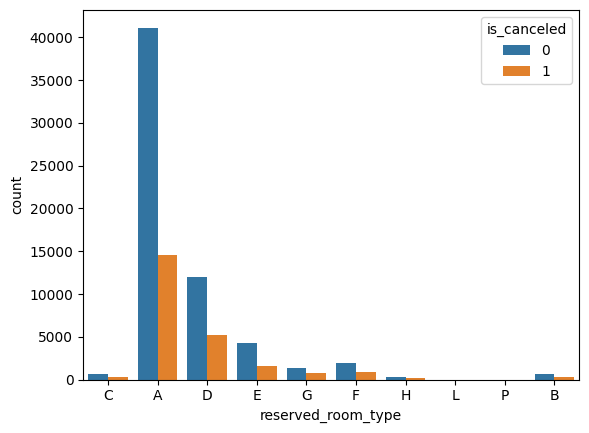

In [172]:
sns.countplot(data = df, x='reserved_room_type', hue = 'is_canceled')

## A타입 방의 예약횟수가 가장 많고 취소율도 다른 방에 비해 높지도 않은 것을 보니 A타입이 호텔의 주력 방 타입인 듯하다. 유지 관리를 잘 하면 취소율 방어에 좋을 듯 하다.(예약객실타입)

In [173]:
df[['is_canceled', 'reserved_room_type', 'assigned_room_type']].value_counts()

is_canceled  reserved_room_type  assigned_room_type
0            A                   A                     31099
1            A                   A                     14065
0            D                   D                     10671
             A                   D                      6107
1            D                   D                      5160
                                                       ...  
0            L                   H                         1
                                 F                         1
                                 B                         1
                                 A                         1
1            D                   C                         1
Name: count, Length: 112, dtype: int64

<Axes: xlabel='is_canceled', ylabel='count'>

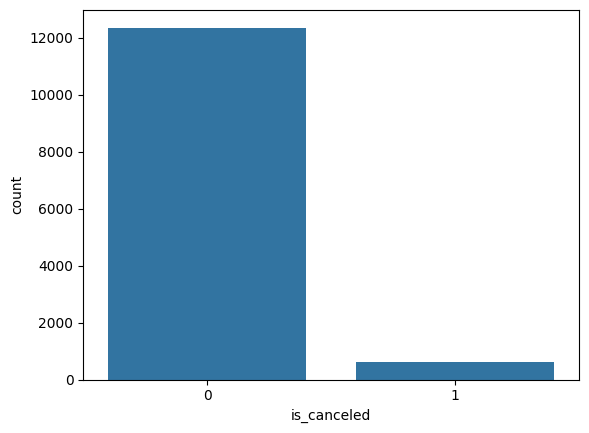

In [174]:
filtered_df = df[df['reserved_room_type'] != df['assigned_room_type']]
sns.countplot(data=filtered_df, x='is_canceled')

## 실제 예약한 방과 다른 방이 배정됐을 때 캔슬여부가 오히려 적은 것을 보면 객실 업그레이드를 해준 건지 내 예측과 결과가 다르다. (실제 어떤 타입이 더 좋은 객실인지 몰라 판단 불가)

In [184]:
df[['is_canceled','booking_changes']].value_counts()
set_df = set_df.drop(columns='booking_changes')

KeyError: "['booking_changes'] not found in axis"

In [193]:
df['agent'].head(10)

0       NaN
1       NaN
2       NaN
3     304.0
4     240.0
6       NaN
7     303.0
8     240.0
9      15.0
10    240.0
Name: agent, dtype: float64

<Axes: ylabel='agent'>

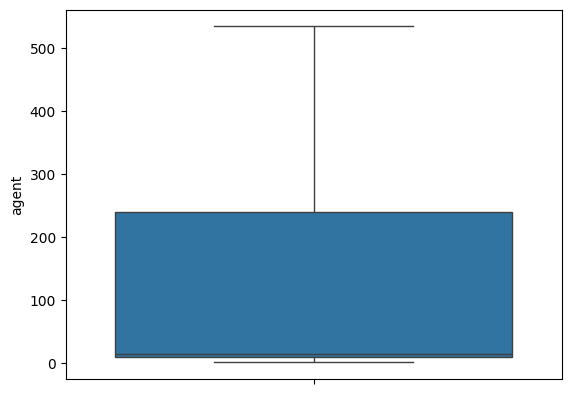

In [187]:
sns.boxplot(data=df['agent'])

In [194]:
df['agent'].isna().sum()

11988

In [210]:
drop_null_agent_df = df.dropna(subset=['agent'])
drop_null_agent_df[['is_canceled', 'agent']].value_counts().head()

is_canceled  agent
0            9.0      17081
1            9.0      11486
0            240.0     7997
1            240.0     4908
0            7.0       2853
Name: count, dtype: int64

## 예약 횟수 상위 2개 여행사사의 취소율이 거의 40프로정도 되는데 예약 회수가 높은 두 여행사사의 취소율을 줄일 방법을 모색해봐야 할 것 같다.

In [213]:
df['company'].isna().sum()

81115

In [215]:
set_df = set_df.drop(columns = 'company')

KeyError: "['company'] not found in axis"

In [219]:
df[['is_canceled','days_in_waiting_list']].value_counts()

is_canceled  days_in_waiting_list
0            0                       61859
1            0                       23597
0            63                         43
             87                         23
             58                         21
                                     ...  
             46                          1
             52                          1
1            79                          1
0            28                          1
             93                          1
Name: count, Length: 203, dtype: int64

<Axes: xlabel='days_in_waiting_list', ylabel='count'>

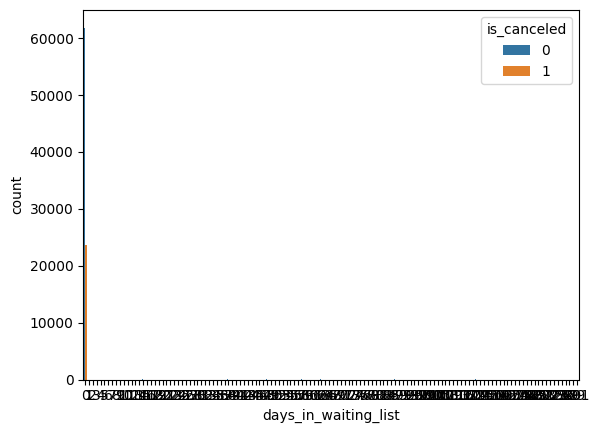

In [228]:
sns.countplot(data=df, x='days_in_waiting_list', hue='is_canceled')

In [230]:
set_df = set_df.drop(columns='days_in_waiting_list')

KeyError: "['days_in_waiting_list'] not found in axis"

In [234]:
df[['is_canceled','required_car_parking_spaces']].value_counts()

is_canceled  required_car_parking_spaces
0            0                              55129
1            0                              23889
0            1                               7236
             2                                 28
             3                                  3
             8                                  2
Name: count, dtype: int64

  parking_group  is_canceled
0   Has Parking     0.000000
1    No Parking     0.302324


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41664\1134499329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parking_group', y='is_canceled', data=cancel_stats, palette=['red', 'blue'])


<Axes: xlabel='parking_group', ylabel='is_canceled'>

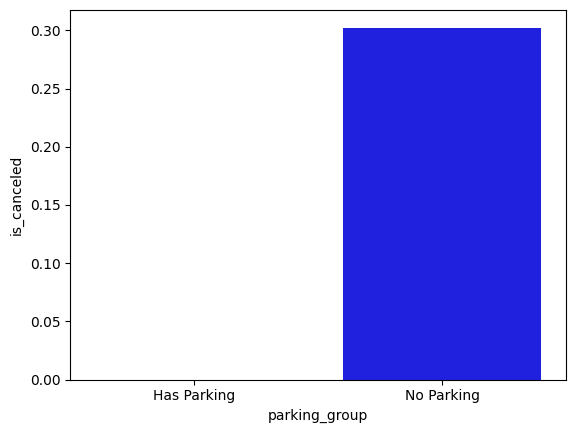

In [ ]:
df['parking_group'] = df['required_car_parking_spaces'].apply(lambda x: 'No Parking' if x == 0 else 'Has Parking')
cancel_stats = df.groupby('parking_group')['is_canceled'].mean().reset_index()  #groupby.mean()은 평균 비율을 구해줌
print(cancel_stats)
sns.barplot(x='parking_group', y='is_canceled', data=cancel_stats, palette=['red', 'blue'])

## 주차 공간이 하나도 없는 경우에는 취소율이 30퍼센트인데 주차 공간이 하나라도 있는 경우에는 취소율이 0퍼센트다. 호텔에 주차공간을 마련한다면 높은 확률로 예약 취소를 예방할 수 있을 것 같다.

In [244]:
df[['is_canceled', 'total_of_special_requests']].value_counts()

is_canceled  total_of_special_requests
0            0                            28740
             1                            22235
1            0                            14491
0            2                             9198
1            1                             6470
             2                             2501
0            3                             1909
1            3                              391
0            4                              282
             5                               34
1            4                               34
             5                                2
Name: count, dtype: int64